# Classification project using supervised machine learning

In [46]:
# main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn libraries - general
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#knn
from sklearn.neighbors import KNeighborsClassifier

#SKDClassifier
from sklearn.linear_model import SGDClassifier

#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv('/Users/erikkonstenius/Downloads/bankruptcy_prediction.csv')

## Preprocessing - visualizing the data

The dependent variable appears to be a dummy variable that takes the values 0 or 1

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.shape

(6819, 96)

"df.describe" is used to find the relative distribution of our values. The output shows that the there are 8819 companies included in the sample

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


'df.info()' is used to find data type and null values. The output shows that there are no null values and that all datatypes are either integers or floats

In [6]:
#df.info()

Next we produce a correlation matrirx to find correlated variables that may cause multicollinearity and increase the variance in our estimated parameters

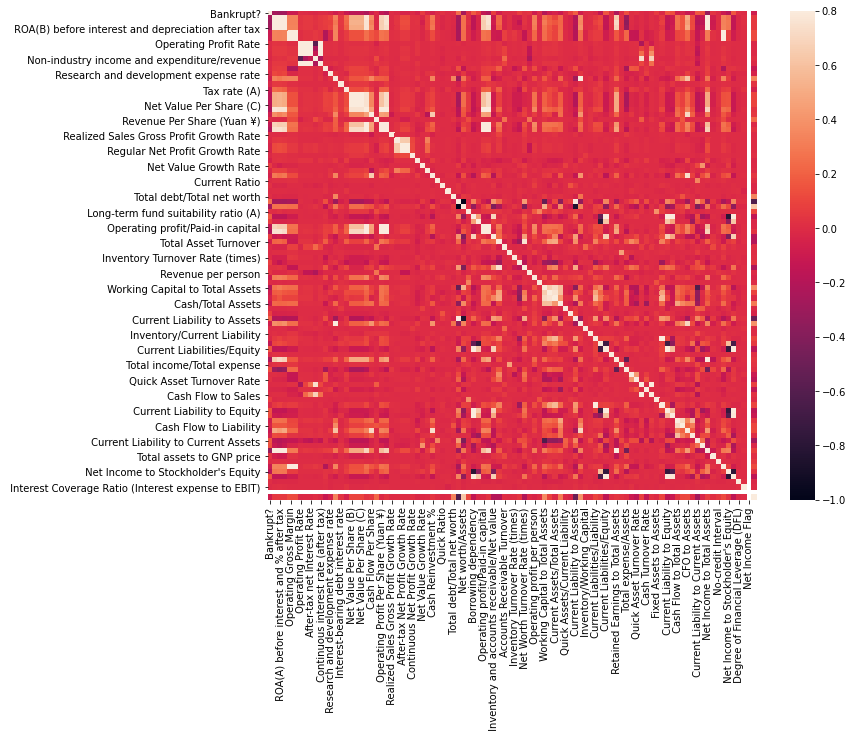

In [7]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

## Preprocessing - altering the data

Shuffle dataframe rows

In [8]:
new_df = df.sample(frac=1, random_state=42)

Group data on features and labels

In [9]:
features = new_df.drop(['Bankrupt?'], axis = 1)
labels = pd.DataFrame(new_df['Bankrupt?'])

feature_array = features.values
label_array = labels.values

Splitting the data in a train set (80 %) and test set (20 %)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20, random_state=42)

Normalize data since some are calculated as a proportion and some are calculated as integer values

In [11]:
X_train = normalize(X_train)
X_test = normalize(X_test)

# Construction of the KNN classifier

In [12]:
neighbours = np.arange(1,6)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree")
    knn.fit(X_train,y_train.ravel())
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

## Evaluating the KNN

As we can see by the output below, we are already reaching high accuracy on both our training set and testing set. The testing accuracy seems to be maximized where the number of neighbours are equal to 4.

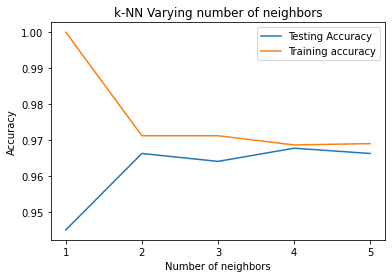

In [13]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.xticks(range(1,6))
plt.ylabel('Accuracy')
plt.show()

Before we celebrate we can conclude from the plot below that most of the observations are of companies that have not gone bankrupt. This means that we have highly skewed classes and that the accuracy is not the most useful metric to evaluate the performance of the model.

<AxesSubplot:>

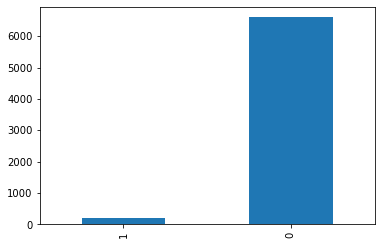

In [14]:
df['Bankrupt?'].value_counts().sort_values().plot(kind = 'bar')

In [15]:
knn=KNeighborsClassifier(n_neighbors=4,algorithm="kd_tree")
knn.fit(X_train,y_train.ravel())
y_pred_knn = knn.predict(X_test)

In [16]:
print(confusion_matrix(y_test, y_pred_knn))

[[1320    1]
 [  43    0]]


In [17]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1321
           1       0.00      0.00      0.00        43

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



The fit and its ability to generalize is evidently not good.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


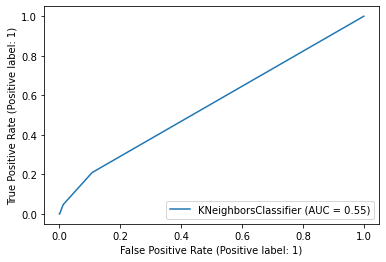

In [18]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

## Dealing with class imbalances using upsampling

The below code upscaled the number of bankrupt observations to equal the number of non-bankrupt observations

In [64]:
from sklearn.utils import resample

df_up = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

# separate minority and majority classes
not_bankrupt = df_up[df_up.iloc[: , -1] == 0]
bankrupt = df_up[df_up.iloc[: , -1]==1]

# upsample minority
data_upsampled = resample(bankrupt,replace=True,n_samples=len(not_bankrupt),random_state=42)

# combine majority and upsampled minority
upsampled = pd.concat([not_bankrupt, data_upsampled])
print("Size of df of bankrupt observations: " + str(bankrupt.shape))
print("Size of df non-bankrupt observations: " + str(not_bankrupt.shape))
print("Size of df of upsampled bankrupt observations: " + str(data_upsampled.shape))
print("Size of combined df: " + str(upsampled.shape))

Up_sampled_X_train = df_up.iloc[: , :-1]
Up_sampled_y_train = df_up.iloc[: , -1]

Size of df of bankrupt observations: (177, 96)
Size of df non-bankrupt observations: (5278, 96)
Size of df of upsampled bankrupt observations: (5278, 96)
Size of combined df: (10556, 96)


In [71]:
#Up_sampled_X_train.describe()
#Up_sampled_y_train.describe()

## Tweeking the hyperparameter of KNN classifier

In [65]:
grid_params = { 'n_neighbors' : [1,2,3,4,5,6],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(Up_sampled_X_train, Up_sampled_y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [72]:
g_res.best_score_

0.9673692492943632

In [73]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'uniform'}

In [74]:
# use the best hyperparameters
knn_HP = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn_HP.fit(Up_sampled_X_train, Up_sampled_y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=4)

## Evaluating the tweeked model

In [75]:
y_pred_knn_HP = knn_HP.predict(Up_sampled_X_train)
y_knn_HP = knn_HP.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(Up_sampled_y_train, y_pred_knn_HP))
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_knn_HP))

Training set accuracy:  0.9686526122823098
Test set accuracy:  0.967741935483871


It is evident that KNN is not a good model to use. Subsequent models will still use upscaling to combat class inbalances.

In [76]:
print(confusion_matrix(y_test, y_knn_HP))
print(classification_report(y_test, y_knn_HP))

[[1320    1]
 [  43    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1321
           1       0.00      0.00      0.00        43

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


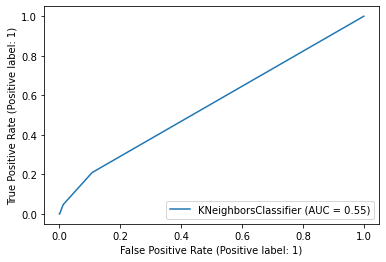

In [77]:
metrics.plot_roc_curve(knn_HP, X_test, y_test)
plt.show()

# Construction of the SGDClassifier

The model is created using the upscaled training data.

In [78]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l2",random_state=42)
sgd_clf.fit(Up_sampled_X_train, Up_sampled_y_train.ravel())
y_predict_SGDC = sgd_clf.predict(X_test)

## Evaluating the SGDClassifier

Once again we see a model that has high accuracy. This is mainly due to the imbalanced classes

In [79]:
cross_val_score(sgd_clf, Up_sampled_X_train, Up_sampled_y_train.ravel(), cv=3, scoring="accuracy")

array([0.9675646 , 0.96754675, 0.96754675])

In [80]:
print(confusion_matrix(y_test, y_predict_SGDC))

[[1321    0]
 [  43    0]]


In [81]:
print(classification_report(y_test, y_predict_SGDC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1321
           1       0.00      0.00      0.00        43

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


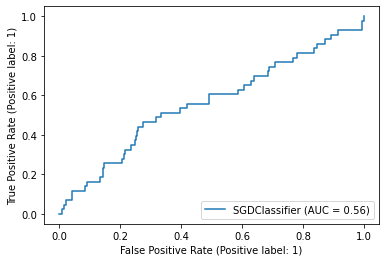

In [82]:
metrics.plot_roc_curve(sgd_clf, X_test, y_test)
plt.show()

The SGDClassifier does not provide any better results than the KNN classifier. Instead of performing hyperparameter tuning I will instead investigate other models.

# Random Forest classifier

In [51]:
rf = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(Up_sampled_X_train, Up_sampled_y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_